<a href="https://colab.research.google.com/github/helenross636/magic_season/blob/main/%23Task15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import time
from collections import defaultdict

In [2]:
# Устанавливаем seed для повторяемости результатов
np.random.seed(42)
# Загружаем данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Преобразование размерности изображений
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
# Нормализация данных
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#random.seed(42)
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/seed(42)/model1.h5')
model2 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/seed(42)/model2.h5')
model3 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/seed(42)/model3.h5')
model4 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/seed(42)/model4.h5')

In [4]:
models = []
models.append(model)
models.append(model2)
models.append(model3)
models.append(model4)

In [5]:
w1500 = (models[1].layers[3].kernel)
print(w1500.shape)
w5000 = (models[2].layers[3].kernel)
print(w5000.shape)

w_PLUS = np.vstack((w1500,w5000))
print('Конкатенация: ',w_PLUS.shape)

(1500, 10)
(5000, 10)
Конкатенация:  (6500, 10)


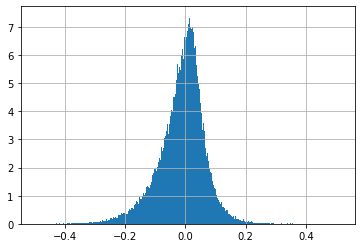

In [ ]:
#plt.figure()
#plt.title('Конкатенация матриц (1500) и (5000)')
#plt.imshow(w_PLUS, cmap='hot')
#plt.colorbar()  

plt.figure()
a = w_PLUS.flatten()
plt.hist(a,bins=400,density=True)
plt.grid(True)


### Получить те элементы матрицы A[0:5000] (модель 5000), которые соответствуют элементам A[5000:] (модель 1500) по метрике корелляции больше 0.9.


матрица по метрике корелляции:  (6500, 6500)
матрица [1500:,0:1500] по метрике корелляции:  (5000, 1500)
Проверка размерности маски:  (5000, 1500)
Длина пар ключей (> 0.9):  1175
Нейронов из сети 5к на замену:  2921


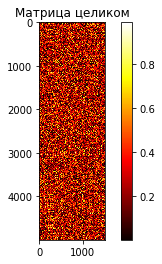

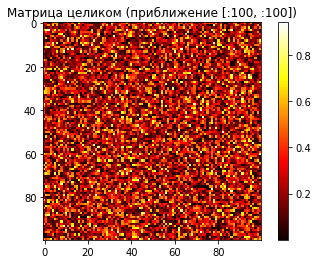

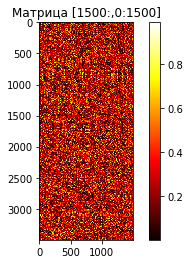

In [6]:
(y,z) = w_PLUS.shape
am = np.zeros((y,y))
am = abs(np.corrcoef(w_PLUS))
np.fill_diagonal(am, 0)
print('матрица по метрике корелляции: ',am.shape)

am2 = am[1500:,0:1500]
print('матрица [1500:,0:1500] по метрике корелляции: ',am2.shape)
mask = am2 > 0.9
print('Проверка размерности маски: ', mask.shape)

#similar = {} #представляют тип данных словаря dict, а словарь состоит из групп значений пар ключей
similar = defaultdict(list)
count = 0;  #сколько нейронов надо будет удалять из сети 5к
for idx, k in enumerate(mask):
  nk = k.nonzero()[0]
  if len(nk) != 0:
    similar[nk[np.argmax(am2[idx, nk])]].append(idx)
    count+=1

print('Длина пар ключей (> 0.9): ',len(similar))
print('Нейронов из сети 5к на замену: ', count)

plt.title('Матрица целиком')
plt.imshow(am2, cmap='hot', interpolation='nearest')
plt.colorbar()

plt.figure()
plt.title('Матрица целиком (приближение [:100, :100])')
plt.imshow(am2[:100, :100], cmap='hot', interpolation='nearest')
plt.colorbar()

plt.figure()
plt.title('Матрица [1500:,0:1500]')
plt.imshow(am2[1500:,0:1500], cmap='hot', interpolation='nearest')
plt.colorbar()


In [ ]:
print(similar)
print('len keys: ',len(similar))

temp = similar
print('temp: ',temp)
rip = []

for num, value in enumerate(temp):
  # value - ключ
  # temp.get(value) - значение по ключу (второй нейрон)
  rip.append(value)
  rip.sort()

print('temp.keys: ', rip)
print(len(rip))


In [7]:
#сколько нейронов в новой сети?
n_count = 5000 - count + len(similar)
print('нейронов в новой сети: ', n_count)

нейронов в новой сети:  3254


In [8]:
#для поиска ключа по слову

def find_me(name, dictionary):
    return [k for k in dictionary if set(dictionary[k]) & {name}]

In [ ]:
print(find_me(492,temp))
print(find_me(2218,temp))
print(find_me(4,temp))
print(len(find_me(4,temp)))
#просто проверка работы

[429]
[113]
[]
0


# #TASK 15

In [9]:
#веса для модели 
w1500_in = np.transpose(models[1].layers[2].kernel)
b1500_in = np.transpose(models[1].layers[2].bias)
w5000_in = np.transpose(models[2].layers[2].kernel)
b5000_in = np.transpose(models[2].layers[2].bias)
print('IN WAIGTHS AND BIAS')
print(w1500_in.shape)
print(b1500_in.shape)
print(w5000_in.shape)
print(b5000_in.shape)

w1500_out = (models[1].layers[3].kernel)
b1500_out = (models[1].layers[3].bias)
w5000_out = (models[2].layers[3].kernel)
b5000_out = (models[2].layers[3].bias)
print('OUT WAIGTHS AND BIAS')
print(w1500_out.shape)
print(b1500_out.shape)
print(w5000_out.shape)
print(b5000_out.shape)


IN WAIGTHS AND BIAS
(1500, 784)
(1500,)
(5000, 784)
(5000,)
OUT WAIGTHS AND BIAS
(1500, 10)
(10,)
(5000, 10)
(10,)


In [45]:
print('key_list', key_list)
2 in key_list

key_list []


False

In [51]:
#матрицы новых (совмещенных) весов
new_in_k = np.zeros((n_count,784))
new_in_b = np.zeros((n_count,))
new_out_k = np.zeros((n_count,10))
new_out_b = np.zeros((10,))
print('на скрытом слое сети нейронов будет равно ', n_count)

key_list = []
for num, value in enumerate(similar):
  # value - ключ
  # key_list.get(value) - значение по ключу (второй нейрон)
  key_list.append(value)
key_list.sort()

idx = 0
for i in range(1500):
  if(i in key_list):
    new_in_k[idx] = w1500_in[i]
    new_in_b[idx] = b1500_in[i]
    new_out_k[idx] = w1500_out[i]
    idx+=1

print('Взяли из модели 1500 нейронов по количеству ', idx)
print('осталось добавить из модели 5000 нейронов = ', n_count-idx)
new_out_k = new_out_k/count

for i in range(5000):
  if((len(find_me(i,similar))) == 0):
    new_in_k[idx] = w5000_in[i]
    new_in_b[idx] = b5000_in[i]
    new_out_k[idx] = w5000_out[i]
    idx+=1

new_out_b = b1500_out

print('Всего взяли нейронов: ', idx)

на скрытом слое сети нейронов будет равно  3254
Взяли из модели 1500 нейронов по количеству  1174
осталось добавить из модели 5000 нейронов =  2080


IndexError: ignored

In [ ]:
#создаем модель
inputs = layers.Input(shape = (784,), name = "in_layer")
x = layers.Flatten()(inputs)
x = layers.Dense(n_count, activation="relu", name = "hidden_layer")(x)
outputs = layers.Dense(10, activation="softmax", name = "out_layer")(x)
model_Colab = tf.keras.Model(inputs = inputs, outputs = outputs)
model_Colab.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model_Colab.summary())

model_Colab.layers[2].set_weights([np.transpose(new_in_k), np.transpose(new_in_b)])
model_Colab.layers[3].set_weights([new_out_k, new_out_b])

#смотрим результат
#scores = model_Colab.evaluate(X_test, Y_test, verbose=0);
#print("МОДЕЛЬ КОНКАТЕНАЦИИ. Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))  

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 in_layer (InputLayer)       [(None, 784)]             0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden_layer (Dense)        (None, 3254)              2554390   
                                                                 
 out_layer (Dense)           (None, 10)                32550     
                                                                 
Total params: 2,586,940
Trainable params: 2,586,940
Non-trainable params: 0
_________________________________________________________________
None
